In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28b2800dd0>,
      dtype=object)

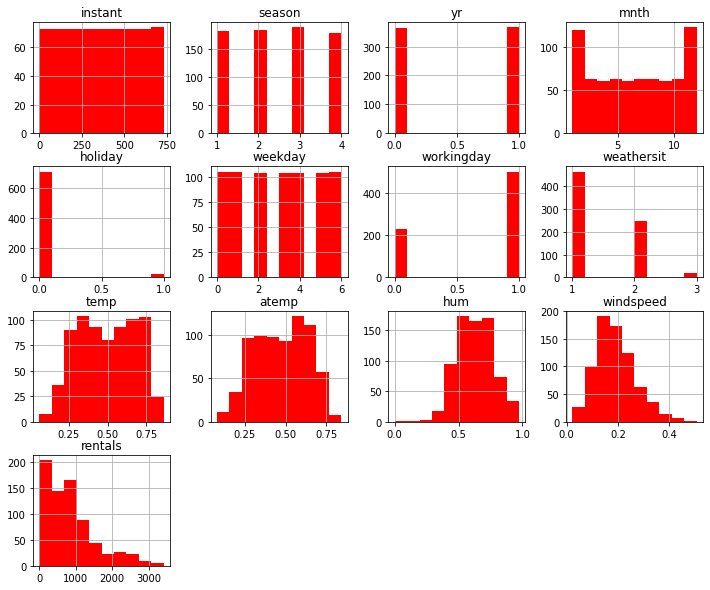

In [12]:
bike_data.hist(figsize=(12,10), color = 'red')


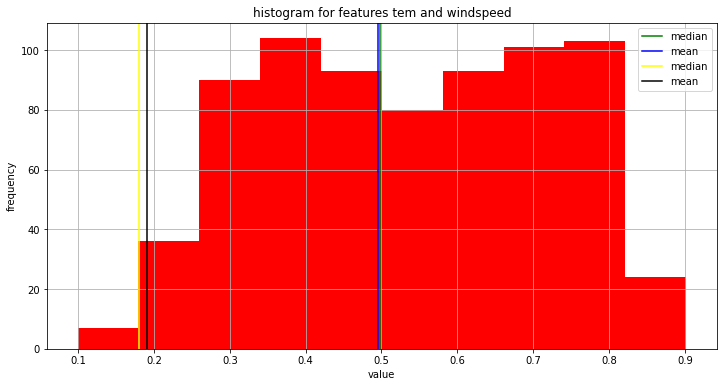

In [36]:
plt.title('histogram for features tem and windspeed')
plt.xlabel('value')
plt.ylabel('frequency')
plt.axvline(x=bike_data.temp.median(), color = 'green', label = 'median')
plt.axvline(x=bike_data.temp.mean(), color = 'blue', label = 'mean')
plt.axvline(x=bike_data.windspeed.median(), color = 'yellow', label = 'median')
plt.axvline(x=bike_data.windspeed.mean(), color = 'black', label = 'mean')
bike_data['temp'].hist(figsize = (12,6),color = 'red', align = 'right')
plt.legend()



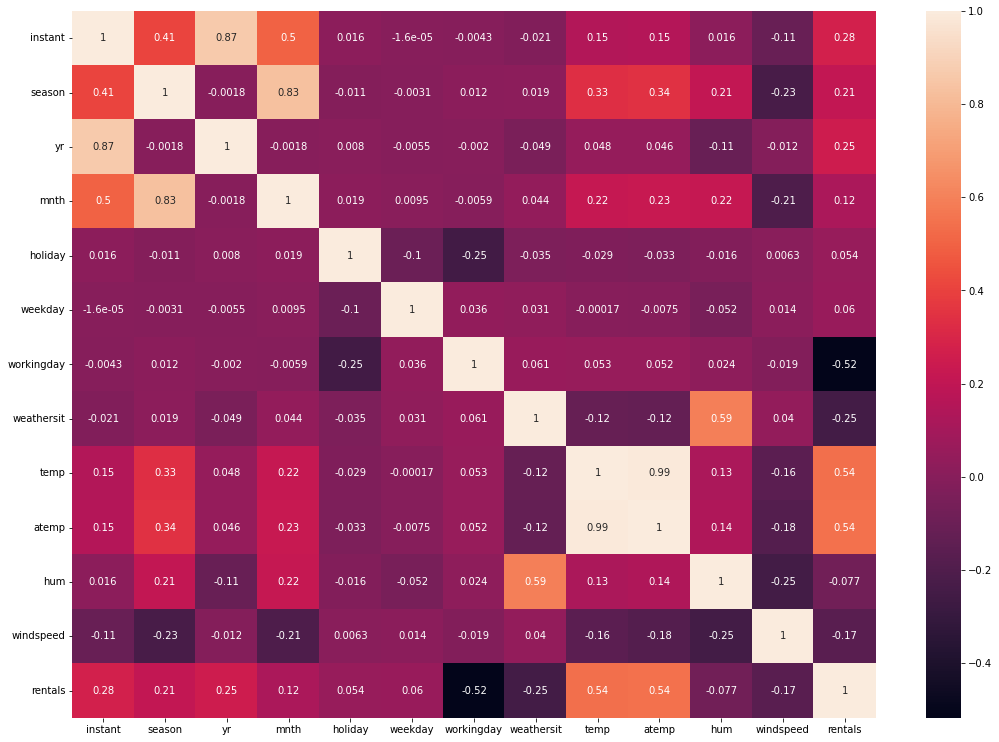

In [14]:
# checking corelation
plt.figure(figsize=(18,13))
sns.heatmap(bike_data.corr(), annot=True)

In [15]:
def generate_dummies(df, dummy_column):
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    df = pd.concat([df, dummies], axis=1)
    return df

X = pd.DataFrame.copy(bike_data)
dummy_columns = ["season", "yr", "mnth", "weekday", "weathersit"]
for dummy_column in dummy_columns:
    X = generate_dummies(X, dummy_column)

In [16]:
X.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [17]:
#remove the original categorical variables: "season", "yr", "mnth", "hr", "weekday", "weathersit"

for dummy_column in dummy_columns:
    del X[dummy_column]

In [18]:
X.head()


,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,rentals,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,1,1/1/2011,0,0,0.344167,0.363625,0.805833,0.160446,331,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,2,1/2/2011,0,0,0.363478,0.353739,0.696087,0.248539,131,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,3,1/3/2011,0,1,0.196364,0.189405,0.437273,0.248309,120,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,1/4/2011,0,1,0.200000,0.212122,0.590435,0.160296,108,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,5,1/5/2011,0,1,0.226957,0.229270,0.436957,0.186900,82,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [19]:
X.head()


,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,rentals,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,1,1/1/2011,0,0,0.344167,0.363625,0.805833,0.160446,331,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,2,1/2/2011,0,0,0.363478,0.353739,0.696087,0.248539,131,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,3,1/3/2011,0,1,0.196364,0.189405,0.437273,0.248309,120,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,1/4/2011,0,1,0.200000,0.212122,0.590435,0.160296,108,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,5,1/5/2011,0,1,0.226957,0.229270,0.436957,0.186900,82,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [26]:
del bike_data['dteday']

In [28]:
#applying feature selection
X = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum',
'windspeed']]
y = [bike_data['rentals']]


In [29]:
from sklearn.model_selection import train_test_split
df_train, df_test  = train_test_split(bike_data, random_state = 22, test_size = 0.2)

In [30]:
y_train = df_train.pop('rentals')
X_train = df_train

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor()
parameters = [{'n_estimators' : [150,200,250,300], 'max_features' : ['auto','sqrt','log2']}]
grid_search = GridSearchCV(estimator = regressor, param_grid = parameters)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


In [32]:
 best_parameters


{'max_features': 'log2', 'n_estimators': 300}

In [33]:
# Random Forest Regression model
# Use the best parameters found from above to build the model

regressor = RandomForestRegressor(n_estimators = 300, max_features = 'auto') 
regressor.fit(X_train,y_train)

# Predicting the values 

y_pred = regressor.predict(X_train) 

In [34]:
# Comparing predicted values with true values in testing set

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train, y_pred)

68.56016552511416

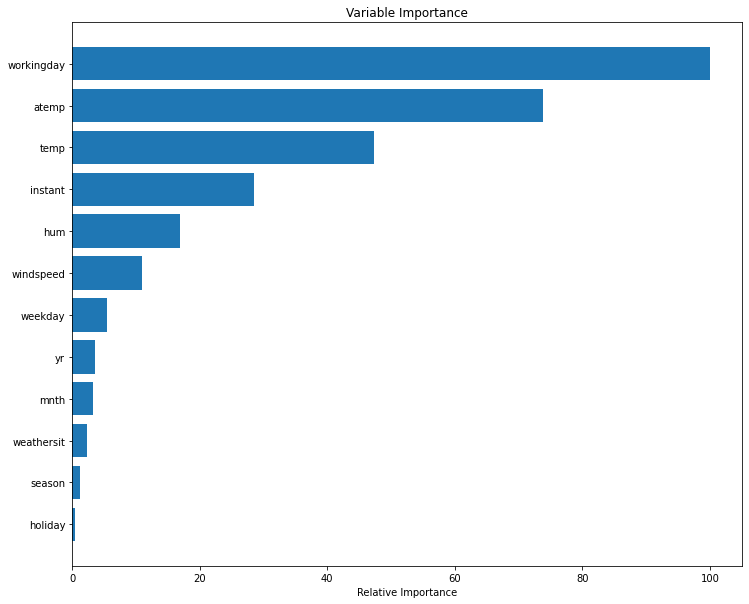

In [35]:

feature_importance = regressor.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()